# MTH9879 Homework 9

Assigned: April 12, 2016.
Due: April 26, 2016 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cC}{\mathcal{C}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Tai-Ho Wang (tai-ho.wang@baruch.cuny.edu) and Jim Gatheral (jim.gatheral@baruch.cuny.edu) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

<font color="blue">If you encounter problems with Markdown/LaTeX or iPython notebook, please contact Yuxi Liu, who has kindly offered to help.


### 1. (18 points)
Following Almgren and Chriss,  assume that the stock price $S_t$ evolves as

$$
dS_t = \sigma\,dZ_t
$$

and the price $\tilde S_t$ at which we transact is given by

$$
\tilde S_t = S_t - \eta\,v_t
$$

where $v_t:=-{\dot x}_t$ is the rate of trading with $x_0 = X$ and $x_T = 0$.

In the lecture notes, we showed that with a risk term that penalizes average VaR instead of variance, the risk-adjusted cost of trading associated with a given price path $\{S_t\}$ is given by

$$
C = \int_0^T\,(S_t - \eta\,v_t) \,dx_t + \lambda\,\sigma\,\int_0^T\,x_t\,dt
$$

for some price of risk $\lambda$. We want to find a (possibly state-dependent) control $v_t$ that minimizes the expected cost $\cC=\E[C]$.

(a) Apply the technique of integration by parts to simplify the term $\int_0^T S_t dx_t$. Write down the HJB equation for the resulting problem.

(b) Solve the first order condition to find the optimal trading rate $v^\star$.    

(c) Substitute $v^\star$ back into the HJB equation to show that the value function $\cC$ must satisfy

$$
\cC_t = \frac{\cC_x^2}{4\,\eta\,} - \lambda \sigma x.
$$

(d) With the terminal condition, 

$$\lim_{t\uparrow T}\cC(t,x) = \begin{cases}0&\text{if $x=0$,}\\
+\infty&\text{if $x\neq0$.}
\end{cases}$$

solve the HJB equation with the ansatz $\cC(t,x) = \eta\,\left[a(t)\,x^2 + b(t)\,x + c(t)\right]$. Verify that the optimal trading rate is given by

$$
v^\star = \frac{x}{T-t} - \frac{1}{4}\, \kappa \, (T-t)
$$

with 

$$
\kappa = \frac{\lambda\,\sigma}{\eta}.
$$

(e) Define the characteristic time $T^\star$ as

$$
T^\star=\sqrt{\frac{4\,X}{\kappa}}=\sqrt{\frac{4\,\eta\,X}{\lambda\,\sigma}}.
$$


Verify that the optimal trading strategy with liquidation horizon $T$ set to the characteristic time $T^\star$ is given by

$$
\begin{eqnarray*}
x_t&=&X\,\left(1-\frac{t}{T}\right)^2.
\end{eqnarray*}
$$


### Problem 1 Solution:
### (a)
\begin{eqnarray}
\mathbb C 
&=& \min_{v_t\in\mathbb G} \E\left[\int_0^T (S_t - \eta v_t) dx_t + \lambda \sigma \int_0^T x_t dt | x_0 = X, S_0 = S\right] \\
&=& \min_{v_t\in\mathcal G} \{\E[\int_0^TS_t dx_t ] - \E[\int_0^T \eta v_t dx_t ]+\E [\lambda \sigma \int_0^T x_t dt \}
\end{eqnarray}
Since we have that
$$
\begin{eqnarray}
\E[ \int_0^T S_t dx_t ] &=& E[ S_t x_t|_0^T - \int_0^T x_t dS_t ]
&=& E[ -XS -\int_0^T\sigma x_tdZ_t ]
&=& -XS
\end{eqnarray}
$$

Then 
\begin{eqnarray}
\mathbb C 
&=& -XS + \min_{v_t\in\mathcal G}  {\E [ - \int_0^T \eta v_t dx_t + \lambda \sigma \int_0^T x_t dt | x_0 = X, S_0 = S ]}\\
&=& -XS + \min_{v_t\in\mathcal G} {\E [\int_0^T \eta v_t^2 dt\lambda \sigma \int_0^T x_t dt  | x_0 = X, S_0 = S ] }
\end{eqnarray}

We now have a deterministic optimal control problem to solve with value function
$$
\tilde{C}(t,x) = \min_{v_t\in\mathcal G} {\E [\int_0^T \eta v_t^2 dt + \lambda \sigma \int_0^T x_t dt | x_0 = X, S_0 = S ] }
$$

HJB equation is as follows,

$$
\frac{\partial{\tilde C}}{\partial t} + \lambda\sigma x_t + \min_{v_t\in\mathcal G} \left\{-\tilde C_x v + \eta v^2 \right\} = 0
$$


### (b)
The optimal trading rate $v^\star$ is solved by taking first derivate of $(-\tilde C_x v + \eta v^2)$ w.r.t $v$, and set it to zero:
$$
\frac{\partial}{\partial v} (-\tilde C_x v + \eta v^2) = -\tilde C_x + 2\eta v = 0.
$$
Then we will get that
$$
v^\star = \frac{1}{2\eta}\tilde C_x.
$$

### (c)
Substitute $v^\star$ back into the HJB equation, we get
$$
\begin{eqnarray}
\frac {\partial{\tilde C}} {\partial t} + \lambda \sigma x_t + {-\tilde C_x \cdot \frac{1}{2\eta}\tilde C_x + \eta \cdot \frac{1}{4\eta^2}\tilde C_x^2 } 
&=& 0
\\
\end{eqnarray}
$$

Then we have that
$$
\tilde C_t = \frac{\partial{\tilde C}}{\partial t} = \frac{1}{4\eta}(\tilde C_x)^2 - \lambda\sigma x_t
$$

### (d)
solve the HJB equation with the ansatz 
$$\cC(t,x) = \eta\,\left[a(t)\,x^2 + b(t)\,x + c(t)\right]
$$ 
we have that
$$
\eta\left[\dot a x^2+\dot b x+\dot c\right]+\lambda \sigma x-\frac{\eta}{4}\left[4a^2 x^2+b^2+4abx \right]=0
$$
Therefore, 

\begin{eqnarray}
\dot a -a^2 = 0 \\
\eta \dot b + \lambda\sigma-\eta ab = 0 \\
\dot c - \frac{b^2}{4} = 0
\end{eqnarray}

With the terminal condition, 

$$\lim_{t\uparrow T}\cC(t,x) = \begin{cases}0&\text{if $x=0$,}\\
+\infty&\text{if $x\neq0$.}
\end{cases}$$

we will get that

\begin{eqnarray*}
a(t)&=&\frac{1}{T-t} \\
b(t)&=&\frac{\lambda \sigma}{2\eta}(T-t)\\
c(t)&=&-\frac{\lambda^2\sigma^2}{48\eta^2}(T-t)^3\\
\end{eqnarray*}

Then we have 
\begin{eqnarray*}
v^\star &=& \frac{\cC_x}{2\eta}
&=& \frac{\eta\left[2a(t)x+b(t)\right]}{2\eta} 
&=& \frac{x}{T-t}+\frac{\lambda\sigma}{4\eta}(T-t)=\frac{x}{T-t}+\frac{\kappa}{4}(T-t) 
\end{eqnarray*}

### (e)
Since $v_t=-{\dot x}_t$, we will have
$$
{\dot x}_t = -(v_t) = -(\frac{x}{T-t}+\frac{\kappa}{4}(T-t))
$$
Solve this equation, with initial condition $ x_0 = X $, we get that
$$
x_t=\left(-\frac{\kappa}{4}t+\frac{X}{T}\right)(T-t)
$$
Since $ T^\star=\sqrt{\frac{4\,X}{\kappa}} $, we have $\kappa = \frac{4X}{T^2} $. Therefore, we have that
$$
x_t=\left(-\frac{\kappa}{4}t+\frac{X}{T}\right)(T-t)=X\left(1-\frac{t}{T}\right)^2
$$

## ABM and GBM

### Download MSFT data

In [4]:
library(highfrequency)
library(xts)
library(zoo)
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/MSFT130311.rData_.zip", destfile="MSFT130311.zip")
unzip(zipfile="MSFT130311.zip")
load("MSFT130311.rData")

### 2. (8 points)

Recall from the lecture slides that with time-averaged VaR as the risk penalty, and when the liquidation time $T$ is chosen to be the characteristic time, the optimal trading rate under ABM becomes

$$
v^A(t)= \frac{x_t}{T-t}\,+\frac{X}{T}\,\left(1-\frac t T\right)
$$

and the optimal trading rate under GBM becomes

$$
v^G(t)= \frac{x_t}{T-t}\,+\frac{X}{T}\,\frac{S_t}{S_0}\,\left(1-\frac t T\right).
$$

(a) The *msft.bats* dataset from *MSFT130311.rData* contains all trades on the BATS exchange on 11-Mar-2013.  One trading days has 390 minutes.  Sample the  *msft.bats* dataset evenly, roughly every minute of volume time.  Superimpose plots of the optimal strategy under ABM and GBM assuming liquidation takes place over one trading day.

(b) Denote the corresponding position sizes by $x^A(t)$ and $x^G(t)$ respectively.  What is the maximum deviation of the two position sizes as a percentage of the initial position $X$?  How significant is this deviation?



### Problem 2 Solution:

,signed.shares,trade.price
1,35,27.95
2,100,27.9
3,900,27.91
4,400,27.94
5,100,27.94
6,100,27.94


,signed.shares,trade.price
1,35,27.95
2,100,27.9
3,900,27.91
4,400,27.94
5,100,27.94
6,100,27.94


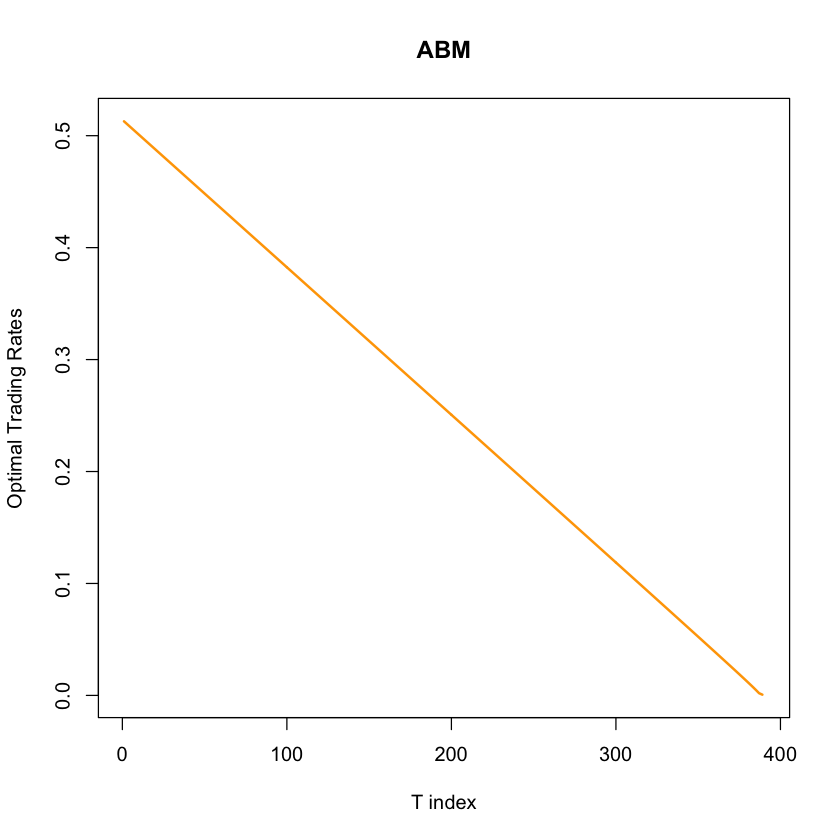

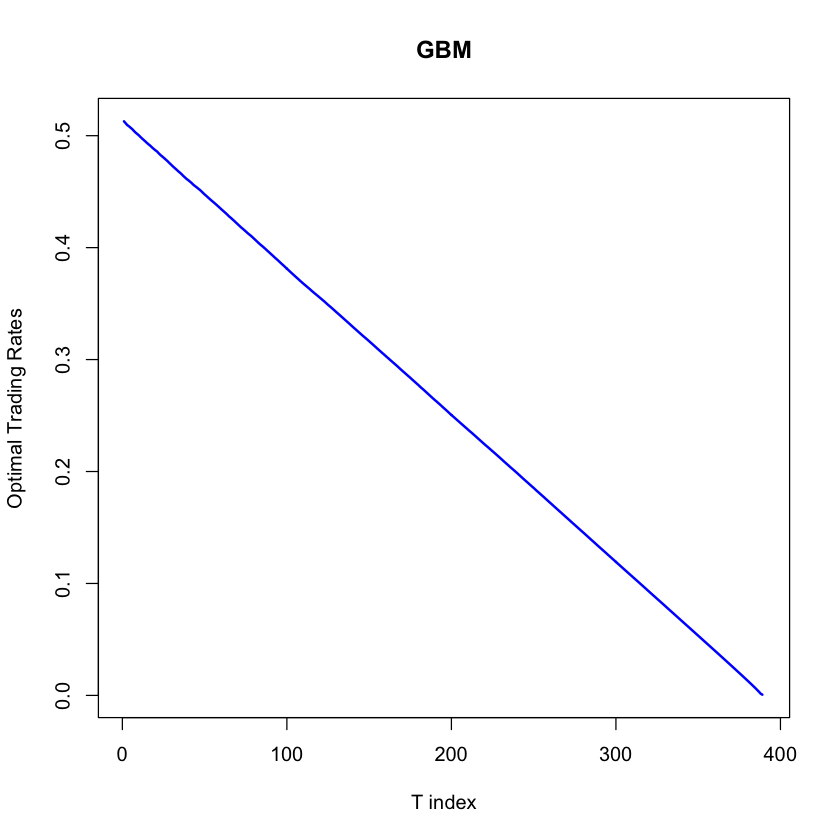

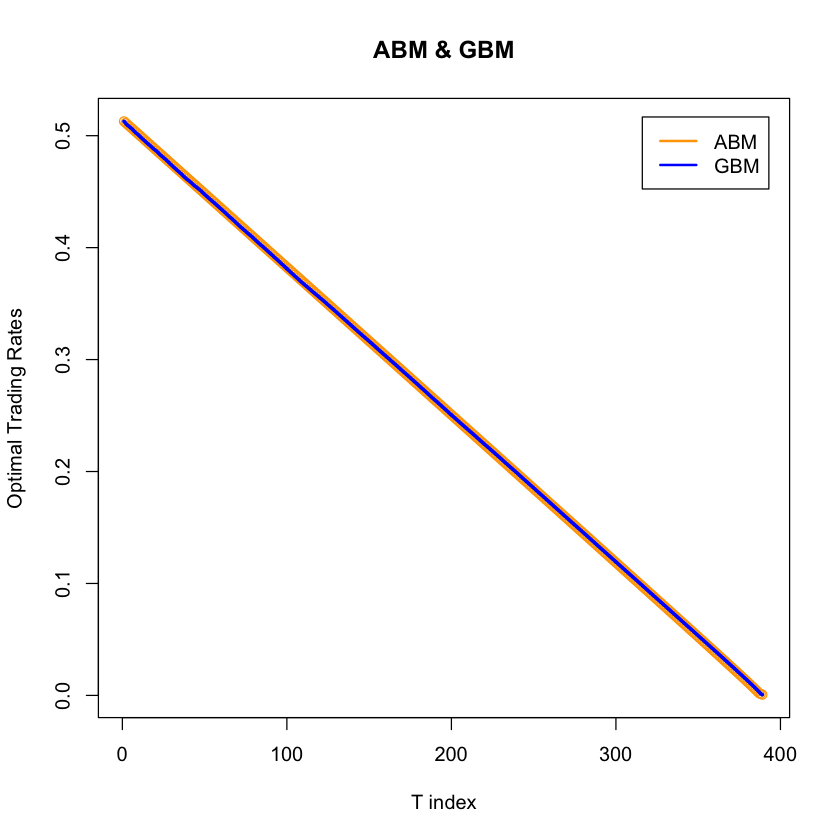

In [19]:
### (a)
data.frame(head(msft130311.bats))

#initialize data
data_frame <- msft130311.bats
counter <- 1    
head(data_frame)
minutes <- 390               
position <- 100               
i_timestamp <- c(1:minutes)   

data_frame$X <- cumsum(abs(data_frame$signed.shares))     
trade_num <- length(data_frame$X)               
vol <- data_frame$X[length(data_frame$X)]              
ts_samples <- seq(1, vol, vol/minutes) 
ls_index <- c(1:length(ts_samples))

    for (i in 1:trade_num) {
        if (counter <=390 && data_frame$X[i] > ts_samples[counter] ) {
            ls_index[counter] = i
            counter <-  counter+1
        }
    }
ts_price <- data_frame[ls_index, 'trade.price']
ABM_x <- c(0:minutes)
ABM_r <- c(1:minutes) 
ABM_x[1] <- position
GBM_x <- c(0:minutes)
GBM_r <- c(1:minutes) 
GBM_x[1] <- position

for (t in 1:minutes){
    ABM_r[t] = abs(ABM_x[t])/(minutes - t) + position / minutes * (1 - t/minutes)
    ABM_x[t+1] = max(ABM_x[t] - ABM_r[t], 0)
    GBM_r[t] = abs(GBM_x[t])/(minutes - t) + position / minutes * ts_price[t]/ts_price[1] * (1 - t/minutes)
    GBM_x[t+1] = max(GBM_x[t] - GBM_r[t], 0)
}

#Plot result
plot(i_timestamp, ABM_r, col = "orange", xlab = "T index", ylab = "Optimal Trading Rates",  type = "l", lwd = 2,main = 'ABM')
plot(i_timestamp, GBM_r, col = "blue", xlab = "T index", ylab = "Optimal Trading Rates", type = "l", lwd = 2, main='GBM')

plot(i_timestamp, ABM_r, xlab = "T index", ylab = "Optimal Trading Rates", col = "orange", type = "p", main = 'ABM & GBM')
lines(i_timestamp, GBM_r, col = "blue", type = "l", lwd = 3)
legend("topright", c("ABM","GBM"), col = c("orange","blue"), lwd = 2, inset = 0.03)

<font color='green'> 
 ABM and GBM are almost the same.
</font>

In [25]:
### (b)
devia <- sapply(timestampe, function(idx)(ABM_x[idx] - GBM_x[idx])/position*100.)
maxnum <- max(abs(devia))
print(maxnum)
cat("The maximum deviation is very small so it is not significant.")

[1] 0.1228432
The maximum deviation is very small so it is not significant.

## Kratz and Schöneborn with time-averaged VaR risk charge

### 3. (12 points)

(a) Repeat the computation of the optimal strategy from the lecture notes with time-averaged VaR

$$
\lambda\,\sigma\,\int_0^T\,x_t\,dt
$$

as the risk term (rather than the quadratic variation $\lambda\,\sigma^2\,\int_0^T\,x_t^2\,dt$).  Show that the optimal position

$$
x^\star(t)=\left(X-\frac{A\, T}{\theta }\right)\,\frac{1-e^{-\theta\,(T-t)} }{1-e^{-\theta\,T }}+\frac{A }{\theta }\,(T-t)
$$
and deduce the optimal trading rate $v^\star(t)$.

(b) By Taylor-expanding the solution around $\theta=0$, show that we retrieve the solution derived in the slides with no dark pool

$$
x^\star(t)=\left(X-\frac{A \, T}{2}\,t\right)\,\left(1-\frac{t}{T}\right) .
$$

in the limit $\theta \to 0$.


### Problem 3 Solution:
### (a)
The expected cost of the strategy

\begin{eqnarray}
\mathcal{C} (t)&=&\eta\,\mathbb{E} \left[\int_t^T\, (\dot x_u^2+\kappa^2\,x_u^2)\,du\right] \\
&=& \eta\,\mathbb{E} \left[\int_t^T\, (\dot x_u^2+\frac{\lambda\,\sigma^2}{\eta}\,x_u^2)\,du\right] \\
&=& \eta\,\E\left[\,\int_0^T\,({\dot x}_t^2 + \frac{\lambda\sigma}{\eta}x_t) 1_{t < t*}\,dt\right] \\
&=& \eta\,\int_0^T\,({\dot x}_t^2 + \frac{\lambda\sigma}{\eta}x_t) e^{-\theta t}\,dt \\
\end{eqnarray}

According to the Euler-Lagrange equation, we have that
\begin{eqnarray}
\frac{d}{dt}(2\dot{x}_te^{-\theta t}) - \frac{\lambda\sigma}{\eta}e^{-\theta t} = 0 \\
2\ddot{x}_t e^{-\theta t} - 2\theta\dot{x}_te^{-\theta t}- \frac{\lambda\sigma}{\eta}e^{-\theta t} = 0 \\
\ddot{x}_t - \theta\dot{x}_t - \frac{\lambda\sigma}{2\eta} = 0
\end{eqnarray}

Denoting $A = \frac{\lambda\sigma}{2\eta}$, and solve the ODE with boundary conditions $X_0 = X$, and $X_T = 0$, we have
$$ 
x^\star(t)=\left(X-\frac{A\, T}{\theta }\right)\,\frac{1-e^{-\theta\,(T-t)} }{1-e^{-\theta\,T }}+\frac{A }{\theta }\,(T-t) 
$$

and the optimal trading rate is
$$
v^\star(t)= -\dot x^\star(t) = \theta(X-\frac{AT}{\theta})\frac{e^{-\theta(T-t)}}{1-e^{-\theta T}} + \frac{A}{\theta}.
$$

### (b)
Using Taylor-expansion for $e^{-\theta\,(T-t)}$ and $e^{-\theta\,T }$ to second degree term around $\theta = 0$, we have that
\begin{eqnarray}
x^\star(t) 
&=&  (X-\frac{A  T}{\theta } ) \frac{1-e^{-\theta (T-t)} }{1-e^{-\theta T }}+\frac{A }{\theta } (T-t)\\
&\approx&  (X-\frac{A  T}{\theta } ) \frac{(T-t)\theta-\frac{1}{2}(T-t)^2\theta^2}{T\theta - \frac{1}{2}T^2\theta^2}+\frac{A }{\theta } (T-t)\\
&=&  (X-\frac{A  T}{\theta } ) \frac{(T-t)-\frac{1}{2}(T-t)^2\theta}{T - \frac{1}{2}T^2\theta}+\frac{A }{\theta } (T-t) \\
&=& X \frac{(T-t)-\frac{1}{2}(T-t)^2\theta}{T - \frac{1}{2}T^2\theta} -\frac{AT}{\theta} \frac{(T-t)-\frac{1}{2}(T-t)^2\theta}{T - \frac{1}{2}T^2\theta} +\frac{A }{\theta }\,(T-t) \\
&=& X \frac{(T-t)-\frac{1}{2}(T-t)^2\theta}{T - \frac{1}{2}T^2\theta} - A(T-t)\left[\frac{\frac{1}{2}t}{1-\frac{1}{2}T\theta} \right]
\end{eqnarray}

As $\theta \to 0$, we have that
$$
x^\star(t)=X(1-\frac{t}{T}) - \frac{A(T-t)t}{2} = X(1-\frac{t}{T}) + \left(-\frac{AT}{2}t \right)\,\left(1-\frac{t}{T} \right) = \left(X-\frac{A \, T}{2}\,t\right)\,\left(1-\frac{t}{T}\right)
$$